## Project 2: Building a Student Intervention System
### Supervised Learning
### Machine Learning Engineer Nanodegree


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

student_data = pd.read_csv("student-data.csv")

student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [2]:
student_data.shape

(395, 31)

# Feature descriptions

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [5]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
# Data filtering using .loc[rows, columns]
passed = student_data[student_data.passed == 'yes']
n_passed = passed.shape[0]

# TODO: Calculate failing students
failed = student_data[student_data.passed == 'no']
n_failed = failed.shape[0]

# TODO: Calculate graduation rate
grad_rate = n_passed * 100 / n_students

# Print the results
print("Number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


In [6]:
# Binarize categorical columns with 2 values
from sklearn.preprocessing import LabelBinarizer

for i in student_data.select_dtypes(exclude=[np.number]).columns:
    if student_data[i].nunique() == 2:
        lbl = LabelBinarizer()
        lbl.fit(student_data[i])
        student_data[i] = lbl.transform(student_data[i])

# Dummify the rest
student_data =\
pd.get_dummies(student_data, prefix='dummy')

student_data = student_data.select_dtypes(include=[np.number])

student_data.shape

(395, 44)

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

X_all = student_data.drop('passed', axis=1)
y_all = student_data['passed']

xtrain, xtest, ytrain, ytest = train_test_split(
    X_all, y_all, test_size=.2)

print("Training set has {} samples.".format(xtrain.shape[0]))
print("Testing set has {} samples.".format(xtest.shape[0]))

Training set has 316 samples.
Testing set has 79 samples.


## Training and Evaluating Models

In [7]:
from sklearn.dummy import DummyClassifier

dum = DummyClassifier()

cv = cross_val_score(dum, xtrain, ytrain, cv=4, scoring='roc_auc')

print(dum, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

DummyClassifier(constant=None, random_state=None, strategy='stratified') 

Mean score: 0.489206445197
Std Dev:    0.0570994343835


In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
params = {
    'n_neighbors': np.arange(1,35,2),
    'leaf_size': np.arange(1,35,2),
    'p': np.arange(1,9,1),
}
grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=4,
           weights='uniform') 

Mean score: 0.650896696769
Std Dev:    0.0264962040969


In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
params = {
    'max_depth': list(np.arange(2,13)) + [None],
    'min_samples_leaf': np.arange(1,11,1),
    'min_samples_split': np.arange(2,21,1),
}

grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Mean score: 0.650570942859
Std Dev:    0.0319657112988


In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
params = {
    'max_depth': list(np.arange(2,13)) + [None],
    'min_samples_leaf': np.arange(1,11,1),
    'min_samples_split': np.arange(2,21,1),
    'n_estimators': [10,50,100]
}

grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=19,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Mean score: 0.612106246304
Std Dev:    0.0276756964641


In [6]:
from xgboost import XGBClassifier

clf = XGBClassifier()
params = {
    'max_depth': [3,4],
    'reg_lambda': np.arange(1.75, 2.26, .25),
    'n_estimators': [50,100]
}

grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain.values, ytrain.values)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain.values, ytrain.values, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=2.25, scale_pos_weight=1, seed=0,
       silent=True, subsample=1) 

Mean score: 0.65310689653
Std Dev:    0.0364643876173


In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    'C': [.05, .1, .15, .2, .5, 1,]
}

grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(xtrain, ytrain)
clf = grid.best_estimator_

cv = cross_val_score(clf, xtrain, ytrain, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

Mean score: 0.663026590004
Std Dev:    0.0437202752036


Somewhat surprisingly, logistic regression beats out the more complicated algorithms -- even XGBoost! Although it's often said that logistic regression is great for interpretability, this comes with an important caveat: you can't always trust the coefficients it spits out. For instance, it might tell you that a house is worth 100,000 dollars more for every bedroom, but 25,000 dollars less for every bathroom. That doesn't mean you should knock down all the bathrooms!

Fortunately, a little common sense goes a long way here. I'd nonetheless supplement a logistic regression with a decision tree to pass along actionable advice. We'll do that in a moment -- after we evaluate our final model.

# Final evaluation on the test data

In [11]:
from sklearn.metrics import roc_auc_score

pred = clf.predict_proba(xtest)[:,1]

print('ROC-AUC on testing data:', roc_auc_score(ytest, pred))

ROC-AUC on testing data: 0.770186335404


This is an excellent model! Using a simple logistic regression, we've accurately singled out the students in the most danger of failing. By using probabilities, and ROC-AUC scores, it also means we can work our way down the list, starting with the students statistically in the most danger, and stopping when we get the sense that we're no longer dealing with at-risk students. We can choose to contact the bottom 10%, 20%, 40%... it's up to us!

# Visualizing with a decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
params = {
    'max_depth': np.arange(1,3),
    'min_samples_leaf': np.arange(1,21),
    'min_samples_split': np.arange(2,21),
}

grid = GridSearchCV(clf, param_grid=params, cv=4, scoring='roc_auc').fit(X_all, y_all)
clf = grid.best_estimator_

cv = cross_val_score(clf, X_all, y_all, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean score:', cv.mean())
print('Std Dev:   ', cv.std())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Mean score: 0.608304358887
Std Dev:    0.0381038291114


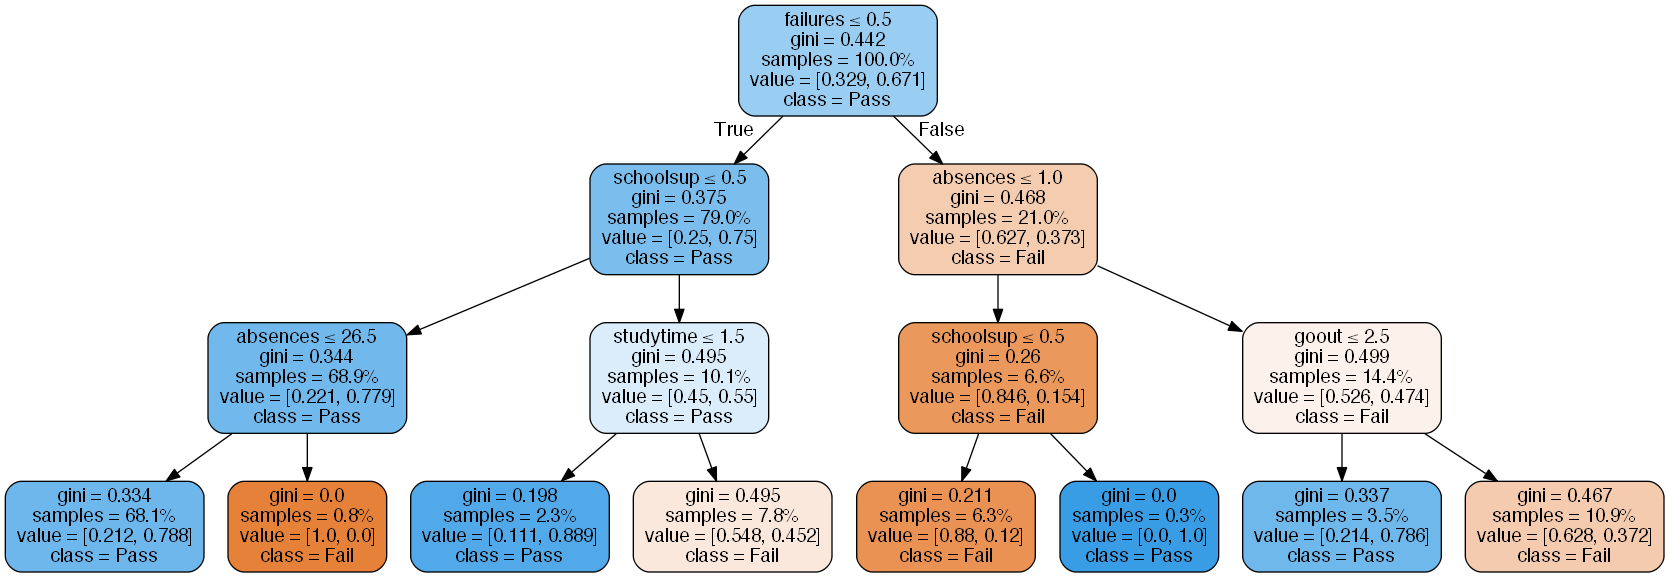

In [27]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
clf = DecisionTreeClassifier(max_depth=3).fit(X_all, y_all)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_all.columns,  
                         class_names=['Fail', 'Pass'],  
                         filled=True, rounded=True, proportion=True, 
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

That's a whopper of a decision tree! But the improved performance over a max_depth of 2 means we'll have to use it. Here's how I would summarize the findings:

- Students that have failed a class before are much more likely to fail this class.

- Among students who have failed before, they can increase their odds of success by spending more time with the material (i.e., going out less often than they usually do), and finding academic support outside of class (e.g., a tutor).

- Support is helpful even for students who aren't at risk. As long as students attend class regularly, and get help when they need it, there's a very good chance they'll pass.